In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df['Rating'].value_counts()

Rating
4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: count, dtype: int64

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# Replace missing values with the median of each category:
df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.median()))

In [9]:
# Check duplicates
df.duplicated().sum()

483

In [10]:
# REmove duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
# Drop rows where 'Current Ver', 'Android Ver','Type','Content Rating' are null
df = df.dropna(subset=['Current Ver', 'Android Ver','Type','Content Rating'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
df['Price'].value_counts()

Price
0          9584
$0.99       144
$2.99       125
$1.99        73
$4.99        70
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: count, Length: 92, dtype: int64

In [14]:
# Convert price to value
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

In [15]:
# Convert installs to value
df['Installs'] = df['Installs'].str.replace('+','', regex=False)   # remove +
df['Installs'] = df['Installs'].str.replace(',','', regex=False)   # remove commas
df['Installs'] = df['Installs'].astype(int)

In [16]:
# Convert last updated to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  object        
 4   Size            10346 non-null  object        
 5   Installs        10346 non-null  int64         
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  float64       
 8   Content Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Last Updated    10346 non-null  datetime64[ns]
 11  Current Ver     10346 non-null  object        
 12  Android Ver     10346 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


In [18]:
#  average rating of apps in the dataset
df['Rating'].mean()

4.203991880920162

In [19]:
# Unique categories
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

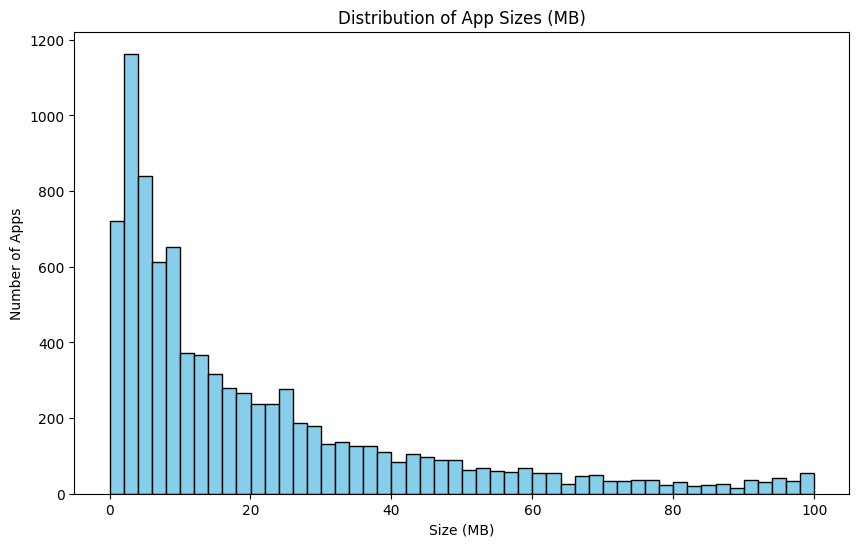

In [20]:
#  distribution of app sizes
# Replace 'Varies with device' with NaN
df['Size'] = df['Size'].replace('Varies with device', np.nan)

# Convert sizes to numeric (M=MB, k=KB)
def size_to_mb(size):
    if pd.isna(size):
        return np.nan
    size = size.strip()
    if size[-1] == 'M':
        return float(size[:-1])
    elif size[-1] == 'k':
        return float(size[:-1]) / 1024  # convert KB to MB
    else:
        return float(size)

df['Size_MB'] = df['Size'].apply(size_to_mb)

plt.figure(figsize=(10,6))
plt.hist(df['Size_MB'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of App Sizes (MB)')
plt.xlabel('Size (MB)')
plt.ylabel('Number of Apps')
plt.show()


In [21]:
# Free vs paid apps
df['Type'].value_counts()

Type
Free    9584
Paid     762
Name: count, dtype: int64

In [22]:
# Most common content rating
df['Content Rating'].mode()[0]

'Everyone'

In [23]:
# Top 5 most installed apps
df.sort_values(by='Installs', ascending=False).head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,NaN
2554,Google+,SOCIAL,4.2,4831125,NaN,1000000000,Free,0.0,Teen,Social,2018-07-26,Varies with device,Varies with device,NaN
3127,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,NaN,1000000000,Free,0.0,Everyone,Travel & Local,2018-08-06,Varies with device,Varies with device,NaN
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13M,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,13.0
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373,NaN,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device,NaN


In [24]:
# apps have a rating of 4.0 and above
high_rated_apps = df[df['Rating'] >= 4.0]

print("Number of apps with Rating >= 4.0:", len(high_rated_apps))

Number of apps with Rating >= 4.0: 8402


In [25]:
#Avg number of reviews for free vs paid apps
# Make sure Reviews column is numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Group by Type and calculate mean of Reviews
avg_reviews = df.groupby('Type')['Reviews'].mean()
print(avg_reviews)


Type
Free    437690.492487
Paid     11946.864829
Name: Reviews, dtype: float64


In [26]:
#average app size for each category
avg_size_per_category = df.groupby('Category')['Size_MB'].mean().sort_values(ascending=False)

# Display
print(avg_size_per_category)

Category
GAME                   44.126816
FAMILY                 27.964800
TRAVEL_AND_LOCAL       24.515960
SPORTS                 24.180992
ENTERTAINMENT          22.638806
PARENTING              22.512963
FOOD_AND_DRINK         22.056122
HEALTH_AND_FITNESS     21.642819
EDUCATION              20.076632
AUTO_AND_VEHICLES      20.036807
MEDICAL                19.383059
FINANCE                17.937470
SOCIAL                 16.875621
PHOTOGRAPHY            16.831950
MAPS_AND_NAVIGATION    16.614368
VIDEO_PLAYERS          16.084441
HOUSE_AND_HOME         15.970010
SHOPPING               15.897718
DATING                 15.825941
LIFESTYLE              14.856415
EVENTS                 13.963617
BUSINESS               13.912536
BEAUTY                 13.795745
COMICS                 13.484869
BOOKS_AND_REFERENCE    13.253664
WEATHER                13.124006
PRODUCTIVITY           12.871599
NEWS_AND_MAGAZINES     12.646415
ART_AND_DESIGN         12.529508
COMMUNICATION          11.657320
P

In [27]:
# apps were last updated in 2018
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Filter for apps updated in 2018
apps_2018 = df[df['Last Updated'].dt.year == 2018]

print("Number of apps updated in 2018:", len(apps_2018))

Number of apps updated in 2018: 6929


In [28]:
# Make sure Installs and Rating are numeric
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Calculate correlation
correlation = df['Installs'].corr(df['Rating'])
print("Correlation between Installs and Rating:", correlation)

Correlation between Installs and Rating: 0.04465064792132513


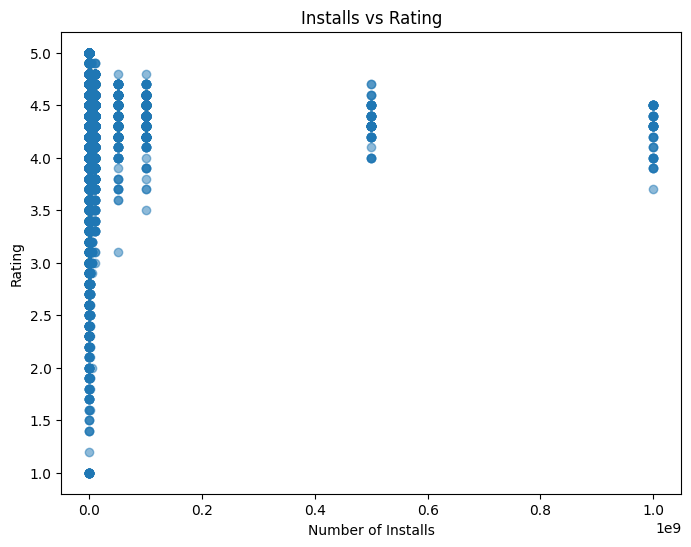

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(df['Installs'], df['Rating'], alpha=0.5)
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.title('Installs vs Rating')
plt.show()

In [30]:
# app categories have the highest average rating?

avg_rating_per_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Display top categories
print(avg_rating_per_category.head())

Category
EVENTS                 4.454688
BOOKS_AND_REFERENCE    4.382096
ART_AND_DESIGN         4.378125
EDUCATION              4.376154
PERSONALIZATION        4.346632
Name: Rating, dtype: float64


In [31]:

# Ensure Price and Rating are numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Filter for paid apps
paid_apps = df[df['Type'] == 'Paid']

# Group by Price and calculate average rating
avg_rating_by_price = paid_apps.groupby('Price')['Rating'].mean().sort_index()

# Display
print(avg_rating_by_price)

Price
0.99      4.311111
1.00      4.400000
1.04      4.300000
1.20      4.200000
1.26      4.300000
            ...   
379.99    2.900000
389.99    3.600000
394.99    4.300000
399.99    4.025000
400.00    3.600000
Name: Rating, Length: 91, dtype: float64


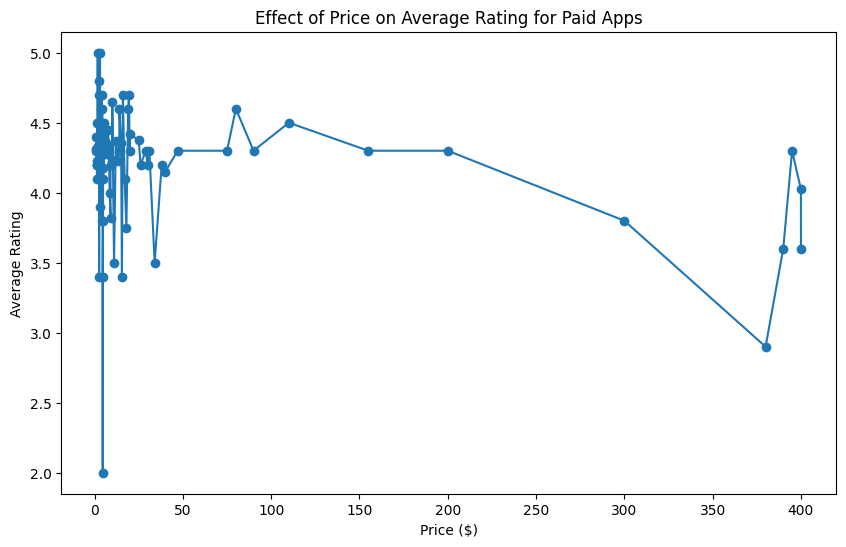

In [32]:
plt.figure(figsize=(10,6))
plt.plot(avg_rating_by_price.index, avg_rating_by_price.values, marker='o')
plt.xlabel('Price ($)')
plt.ylabel('Average Rating')
plt.title('Effect of Price on Average Rating for Paid Apps')
plt.show()

In [33]:
df['Content Rating'].nunique()

6

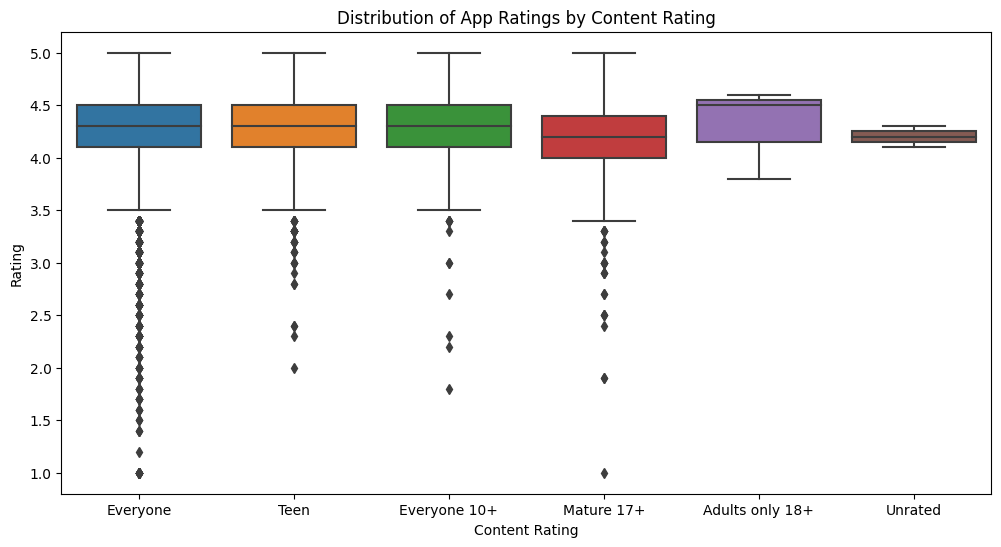

In [34]:

plt.figure(figsize=(12,6))
sns.boxplot(x='Content Rating', y='Rating', data=df)
plt.title('Distribution of App Ratings by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.show()

In [35]:
# genres have the most apps with over 1 million installs
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Filter apps with over 1 million installs
popular_apps = df[df['Installs'] > 1_000_000]

# Group by Genres and count number of apps
top_genres = popular_apps.groupby('Genres')['App'].count().sort_values(ascending=False)

# Display top genres
print(top_genres.head())

Genres
Tools            187
Action           182
Photography      161
Communication    146
Productivity     124
Name: App, dtype: int64


In [36]:
#  frequently do apps get updated? Calculate the average time between updates.
# Ensure Last Updated is datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Sort by App and Last Updated
df = df.sort_values(by=['App', 'Last Updated'])

# Calculate difference between consecutive updates for each app
df['Update_Diff'] = df.groupby('App')['Last Updated'].diff()

# Calculate the average update frequency (in days)
avg_update_time = df['Update_Diff'].dt.days.mean()
print("Average time between updates (days):", avg_update_time)


Average time between updates (days): 7.8796561604584525


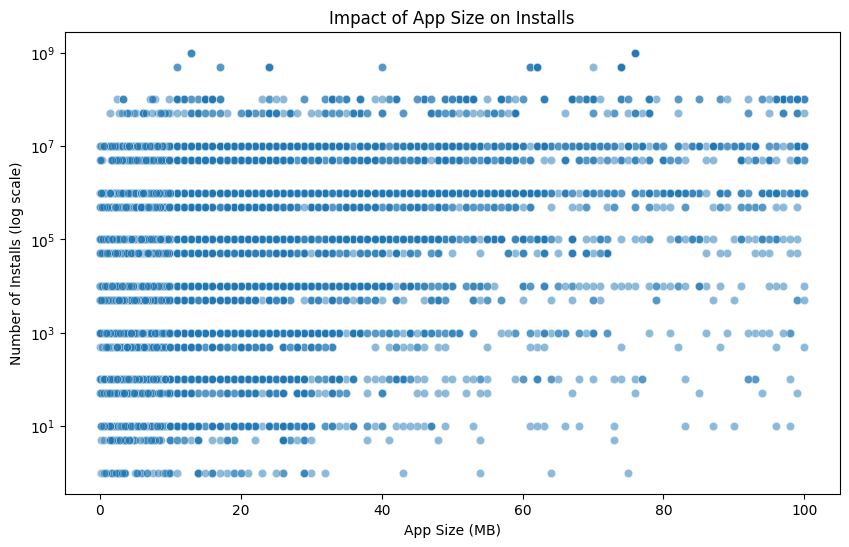

In [37]:
# impact of app size on the number of installs
plt.figure(figsize=(10,6))
sns.scatterplot(x='Size_MB', y='Installs', data=df, alpha=0.5)

plt.yscale('log')  # log scale for installs (optional)
plt.title('Impact of App Size on Installs')
plt.xlabel('App Size (MB)')
plt.ylabel('Number of Installs (log scale)')
plt.show()



In [38]:
# Calculate correlation between size and number of installs
# Ensure Size_MB and Installs are numeric
df['Size_MB'] = pd.to_numeric(df['Size_MB'], errors='coerce')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Calculate correlation
correlation = df['Size_MB'].corr(df['Installs'])
print("Correlation between App Size and Installs:", correlation)

# correlation of 0.16 shows weak positive correlation

Correlation between App Size and Installs: 0.16880485342823862


In [39]:
# apps have the highest number of reviews, and what are their ratings?
# Ensure Reviews is numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Sort by Reviews in descending order
top_reviewed = df.sort_values(by='Reviews', ascending=False).head(5)

# Display App name, Reviews, and Rating
top_reviewed[['App', 'Reviews', 'Rating']]

,App,Reviews,Rating
2544,Facebook,78158306,4.1
3943,Facebook,78128208,4.1
336,WhatsApp Messenger,69119316,4.4
3904,WhatsApp Messenger,69109672,4.4
2604,Instagram,66577446,4.5


In [40]:
# content rating distribution differ between free and paid apps?
# Create a crosstab
content_type_crosstab = pd.crosstab(df['Content Rating'], df['Type'])

print(content_type_crosstab)

Type             Free  Paid
Content Rating             
Adults only 18+     3     0
Everyone         7713   659
Everyone 10+      344    32
Mature 17+        428    19
Teen             1094    52
Unrated             2     0


In [41]:
# top 5 categories with the most installs?
# Ensure Installs is numeric
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Group by Category and sum installs
installs_per_category = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Select top 5 categories
top5_categories = installs_per_category.head(5)
print(top5_categories)

Category
GAME             31544024415
COMMUNICATION    24152276251
SOCIAL           12513867902
PRODUCTIVITY     12463091369
TOOLS            11452271905
Name: Installs, dtype: int64


In [42]:
# top 10 apps with the highest ratings, and how do their number of reviews and installs compare?
# Ensure Rating, Reviews, Installs are numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Sort by Rating (descending) and pick top 10
top_rated_apps = df.sort_values(by='Rating', ascending=False).head(10)

# Display App, Rating, Reviews, Installs
top_rated_apps[['App', 'Rating', 'Reviews', 'Installs']]

,App,Rating,Reviews,Installs
10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",5.0,104,1000
7623,CN Resident,5.0,1,100
9530,Ek Qissa He Quran Se (Qurani Waqiyat),5.0,4,100
5230,AJ Cam,5.0,44,100
5263,AJ Blue Icon Pack,5.0,4,50
9511,Ek Bander Ne Kholi Dukan,5.0,10,10000
5196,AI Today : Artificial Intelligence News & AI 101,5.0,43,100
9365,Eh Bee Wallpapers HD,5.0,4,100
6171,BG Guide,5.0,3,100
10656,Wallpapers FN SCAR H,5.0,4,100


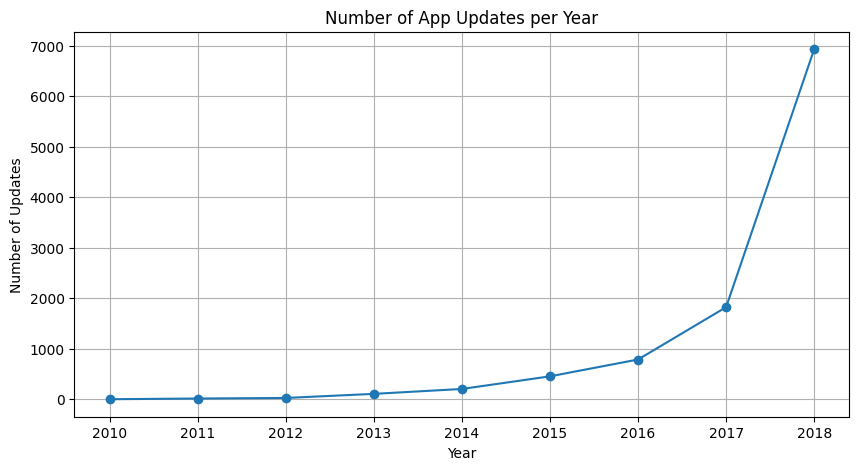

In [45]:
# trend of app updates over time. Are there any noticeable patterns or seasonal trends?
updates_per_year = df['Last Updated'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,5))
updates_per_year.plot(kind='line', marker='o')
plt.title('Number of App Updates per Year')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.grid(True)
plt.show()

Installs_Bin
<1k         4.249737
1k-10k      4.046698
10k-100k    4.099064
100k-1M     4.207089
1M-10M      4.285675
>10M        4.382995
Name: Rating, dtype: float64


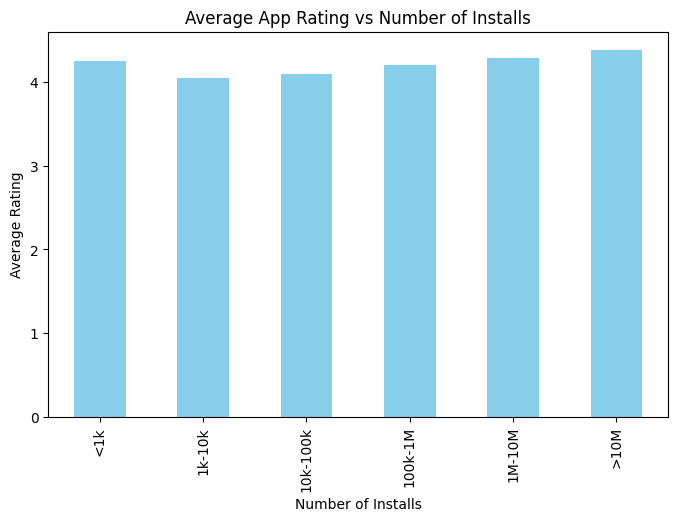

In [48]:
# average rating of apps change with the number of installs? Create a binned analysis.
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Define bins (log scale is often helpful due to skew)
bins = [0, 1000, 10000, 100000, 1000000, 10000000, 100000000]
labels = ['<1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '>10M']

df['Installs_Bin'] = pd.cut(df['Installs'], bins=bins, labels=labels)

avg_rating_per_bin = df.groupby('Installs_Bin')['Rating'].mean()
print(avg_rating_per_bin)


avg_rating_per_bin.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Average App Rating vs Number of Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Average Rating')
plt.show()


In [49]:
# relationship between app genre and user ratings? Are certain genres consistently rated higher or lower?
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

rating_by_genre = df.groupby('Genres')['Rating'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)
print(rating_by_genre)


                                        mean  median
Genres                                              
Comics;Creativity                    4.80000     4.8
Board;Pretend Play                   4.80000     4.8
Health & Fitness;Education           4.70000     4.7
Puzzle;Education                     4.60000     4.6
Adventure;Brain Games                4.60000     4.6
...                                      ...     ...
Educational;Creativity               3.96000     4.2
Educational                          3.92973     4.0
Health & Fitness;Action & Adventure  3.90000     3.9
Art & Design;Pretend Play            3.90000     3.9
Parenting;Brain Games                3.80000     3.8

[119 rows x 2 columns]


**Insights**
1. Ratings: i]Most apps are rated between 4.0 and 4.5.
           ii]Apps with very high ratings (4.8–5.0) are fewer and often less installed.

2. Categories & Genres: i]Higher-rated genres: Productivity, Health & Fitness, Education.
                       ii]Lower-rated genres: Tools, Finance.
                      iii]Top categories by installs do not always have the highest ratings.

3. Installs vs Ratings: i]Weak correlation (~0.16) → popularity doesn’t strongly predict ratings.
                       ii]Apps with very few installs show extreme ratings; highly installed apps cluster                             near the average.
4. Free vs Paid Apps: i]Free apps dominate in number and reviews.
                     ii]Paid apps may have slightly higher average ratings.
                    iii]Content rating distributions differ slightly between Free and Paid apps.

5. App Size & Updates: i]App size has minimal effect on installs.
                      ii]Apps updated more frequently tend to maintain user satisfaction.
                     iii]Updates are more common in recent years, with slight seasonal peaks.

6. Reviews & Sentiment: i]Most-reviewed apps are also highly installed.
                       ii]High-rated apps: positive sentiment (e.g., easy, useful).
                      iii]Low-rated apps: negative sentiment (e.g., crash, bug, slow).

7. Price & Rating: i]Price has little impact on average rating.
                  ii]Most paid apps are below $10; ratings are similar to free apps.

**Key Takeaways**
Popularity ≠ satisfaction.
Certain genres consistently perform better.
Frequent updates help maintain good ratings.
Sentiment analysis aligns with app ratings.